In [0]:
# Activate R magic
%load_ext rpy2.ipython

In [0]:
# Problemas com acentuação, consultar este link:
# https://support.rstudio.com/hc/en-us/articles/200532197-Character-Encoding

In [0]:
# Importar imagens
from google.colab import files
from IPython.display import Image

In [0]:
# Configurar o diretório de trabalho
setwd("~/Dropbox/DSA/BigDataAnalytics-R-Azure/Projetos/Mini-Projeto04")
getwd()

# Mapeando a ocorrência do vírus Zika
[link text](http://combateaedes.saude.gov.br/pt/situacao-epidemiologica)

In [0]:
%%R
# Carregando os pacotes
# devtools::install_github("wch/webshot")
install.packages("dplyr")
install.packages("ggplot2")
library(dplyr)
library(ggplot2)

In [7]:
%%R
# Listando os arquivos formato. csv neste diretório e gerando uma lista com os respectivos nomes
temp_files <- list.files(pattern = ".csv") 
temp_files

[1] "Epidemiological_Bulletin-2016-04-02.csv"
[2] "Epidemiological_Bulletin-2016-04-23.csv"
[3] "Epidemiological_Bulletin-2016-04-30.csv"
[4] "Epidemiological_Bulletin-2016-05-07.csv"
[5] "Epidemiological_Bulletin-2016-05-14.csv"
[6] "Epidemiological_Bulletin-2016-05-21.csv"
[7] "Epidemiological_Bulletin-2016-05-28.csv"
[8] "Epidemiological_Bulletin-2016-06-11.csv"


## Aplicar read.csv() à lista de arquivos temp_files com a função lapply() 

In [0]:
%%R
# Carregando todos os arquivos em um único objeto
myfiles <- lapply(temp_files, read.csv, stringsAsFactors = FALSE) 

## Analisar names e head com lapply()

In [13]:
%%R
# Resumo dos arquivos
str(myfiles, 1)
lapply(myfiles, names)[1]    # nomes das colunas dos arquivos
lapply(myfiles, head,2)[1:2] 

List of 8
 $ :'data.frame':	33 obs. of  9 variables:
 $ :'data.frame':	33 obs. of  9 variables:
 $ :'data.frame':	33 obs. of  9 variables:
 $ :'data.frame':	33 obs. of  9 variables:
 $ :'data.frame':	33 obs. of  9 variables:
 $ :'data.frame':	33 obs. of  9 variables:
 $ :'data.frame':	33 obs. of  9 variables:
 $ :'data.frame':	33 obs. of  9 variables:
[[1]]
  report_date        location location_type    data_field data_field_code
1  2016-04-02           Norte        region zika_reported          BR0011
2  2016-04-02 Brazil-Rondonia         state zika_reported          BR0011
  time_period time_period_type value  unit
1          NA               NA  6295 cases
2          NA               NA   618 cases

[[2]]
  report_date    location location_type    data_field data_field_code
1  2016-04-23       Norte        region zika_reported          BR0011
2  2016-04-23 Brazil-Acre         state zika_reported          BR0011
  time_period time_period_type value  unit
1          NA               N

## Organizando Shape dos Dados

In [0]:
%%R
# Organizando o shape dos dados
brazil <- do.call(rbind, myfiles) #do.call

brazil <- brazil %>% 
  mutate(report_date = as.Date(report_date)) #mutate

In [16]:
%%R
# Visualizando o dataset
glimpse(brazil)

Rows: 264
Columns: 9
$ report_date      <date> 2016-04-02, 2016-04-02, 2016-04-02, 2016-04-02, 201…
$ location         <chr> "Norte", "Brazil-Rondonia", "Brazil-Acre", "Brazil-A…
$ location_type    <chr> "region", "state", "state", "state", "state", "state…
$ data_field       <chr> "zika_reported", "zika_reported", "zika_reported", "…
$ data_field_code  <chr> "BR0011", "BR0011", "BR0011", "BR0011", "BR0011", "B…
$ time_period      <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ time_period_type <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ value            <int> 6295, 618, 375, 1520, 44, 771, 74, 2893, 30286, 1202…
$ unit             <chr> "cases", "cases", "cases", "cases", "cases", "cases"…


In [0]:
%%R
# Transformando o dataframe um uma tabela dplyr e removendo as colunas 5 a 7
brazil <- brazil %>% select(-(6:7)) 

In [18]:
%%R
# Visualizando as primeiras 20 linhas
brazil %>% slice (1:20) 

   report_date                   location location_type    data_field
1   2016-04-02                      Norte        region zika_reported
2   2016-04-02            Brazil-Rondonia         state zika_reported
3   2016-04-02                Brazil-Acre         state zika_reported
4   2016-04-02            Brazil-Amazonas         state zika_reported
5   2016-04-02             Brazil-Roraima         state zika_reported
6   2016-04-02                Brazil-Para         state zika_reported
7   2016-04-02               Brazil-Amapa         state zika_reported
8   2016-04-02           Brazil-Tocantins         state zika_reported
9   2016-04-02                   Nordeste        region zika_reported
10  2016-04-02            Brazil-Maranhao         state zika_reported
11  2016-04-02               Brazil-Piaui         state zika_reported
12  2016-04-02               Brazil-Ceara         state zika_reported
13  2016-04-02 Brazil-Rio_Grande_do_Norte         state zika_reported
14  2016-04-02      

## Aplicando filtro por região 

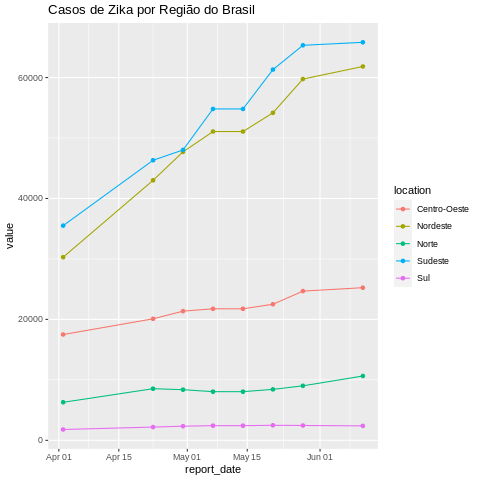

In [19]:
%%R
# Para cada reporting_date nós temos 5 regiões
brazil %>% filter(location_type == "region")
brazil %>% filter(location_type == "region") %>% #concatenando filto

  ggplot(aes(x = report_date, y = value, group = location, color = location)) + 
  geom_line() +  # gráfico de linhas
  geom_point() + # pontos às linhas
  ggtitle("Casos de Zika por Região do Brasil")


In [0]:
%%R
# Separando as regiões e Visualizando os Dados
region <- brazil %>% 
  filter(location_type == "region")



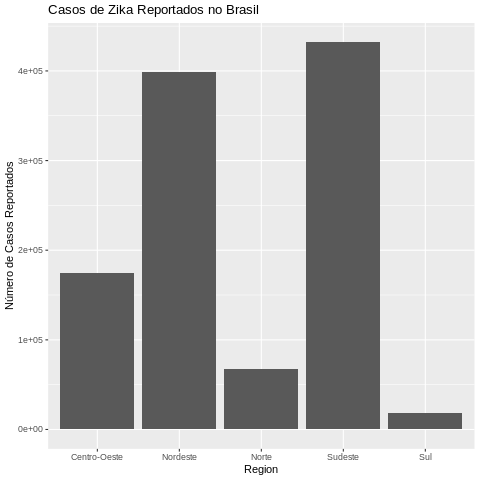

In [21]:
%%R
region %>% 
  ggplot(aes(x =location, y = value)) + geom_bar(stat = "identity") +
  ylab("Número de Casos Reportados") + xlab("Region") + 
  ggtitle("Casos de Zika Reportados no Brasil")

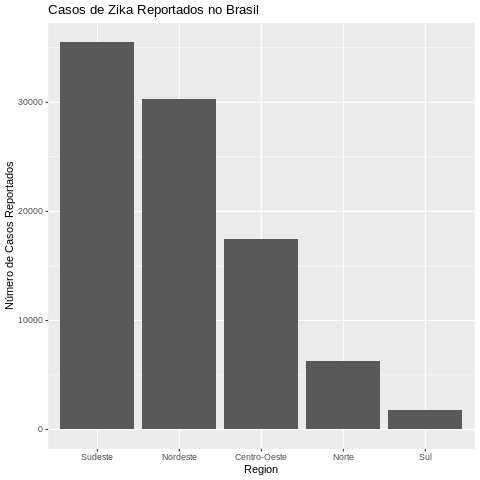

In [22]:
%%R
region %>% 
  slice(1:length(unique(region$location))) %>% 
  arrange(desc(value)) %>%
  mutate(location = factor(location, levels = location,ordered = TRUE)) %>%
  ggplot(aes(x = location, y = value)) + geom_bar(stat = "identity") +
  ylab("Número de Casos Reportados") + xlab("Region") + 
  ggtitle("Casos de Zika Reportados no Brasil")


In [23]:
%%R
# Obtendo localidades únicas
region %>% 
  slice(1:length(unique(region$location)))

  report_date     location location_type    data_field data_field_code value
1  2016-04-02        Norte        region zika_reported          BR0011  6295
2  2016-04-02     Nordeste        region zika_reported          BR0011 30286
3  2016-04-02      Sudeste        region zika_reported          BR0011 35505
4  2016-04-02          Sul        region zika_reported          BR0011  1797
5  2016-04-02 Centro-Oeste        region zika_reported          BR0011 17504
   unit
1 cases
2 cases
3 cases
4 cases
5 cases


In [24]:
%%R
# Organziando as localidades únicas por número de casos reportados
region %>% 
  slice(1:length(unique(region$location))) %>% 
  arrange(desc(value))

  report_date     location location_type    data_field data_field_code value
1  2016-04-02      Sudeste        region zika_reported          BR0011 35505
2  2016-04-02     Nordeste        region zika_reported          BR0011 30286
3  2016-04-02 Centro-Oeste        region zika_reported          BR0011 17504
4  2016-04-02        Norte        region zika_reported          BR0011  6295
5  2016-04-02          Sul        region zika_reported          BR0011  1797
   unit
1 cases
2 cases
3 cases
4 cases
5 cases


In [25]:
%%R
# Criando variáveis do tipo fator
region %>% 
  slice(1:length(unique(region$location))) %>% 
  arrange(desc(value)) %>%
  mutate(location = factor(location,levels=location,ordered=TRUE)) %>% 
  glimpse()


Rows: 5
Columns: 7
$ report_date     <date> 2016-04-02, 2016-04-02, 2016-04-02, 2016-04-02, 2016…
$ location        <ord> Sudeste, Nordeste, Centro-Oeste, Norte, Sul
$ location_type   <chr> "region", "region", "region", "region", "region"
$ data_field      <chr> "zika_reported", "zika_reported", "zika_reported", "z…
$ data_field_code <chr> "BR0011", "BR0011", "BR0011", "BR0011", "BR0011"
$ value           <int> 35505, 30286, 17504, 6295, 1797
$ unit            <chr> "cases", "cases", "cases", "cases", "cases"


In [26]:
%%R
# Agrupando o Sumarizando
brazil_totals <- brazil %>% filter(location=="Brazil") 
region_totals <- brazil %>% filter(location_type=="region") %>%
  group_by(report_date,location) %>%  
  summarize(tot = sum(value)) 

R[write to console]: `summarise()` regrouping output by 'report_date' (override with `.groups` argument)



In [0]:
%%R
# Padronizar os dados e remover as sumarizações
regvec <- vector()  
length(regvec) <- nrow(brazil)
for (ii in 1:nrow(brazil)) {
  if (brazil[ii,]$location_type != "region")  {
    regvec[ii] <- newlab
  } else {
    newlab <- brazil[ii,]$location
    regvec[ii] <- newlab
  }
}

In [0]:
%%R
# Agregando o vetor de regiões ao dataframe brasil
statedf <- cbind(brazil,regvec)

In [0]:
%%R
# Eliminar o sumário de linhas por região e país
statedf <- statedf %>% filter(location != "Brazil") 
statedf <- statedf %>% filter(location_type != "region")

In [31]:
%%R
# Gerar o total por regiões a partir dos dados transformados
statedf %>% group_by(report_date,regvec) %>% 
  summarize(tot=sum(value)) -> totals

R[write to console]: `summarise()` regrouping output by 'report_date' (override with `.groups` argument)



In [0]:
%%R
install.packages("ggmap")
library(ggmap)

In [0]:
%%R
# Gerando os mapas de cada estado do Brasil
library(ggmap)
longlat <- geocode(unique(statedf$location)) %>% 
  mutate(loc = unique(statedf$location)) 

In [0]:
%%R
# Salvando os geocodes do dataframe statedf e salvando em um novo dataframe chamado formapping
statedf %>% filter(as.character(report_date) == "2016-06-11") %>% 
  group_by(location) %>% summarize(cases = sum(value)) %>% 
  inner_join(longlat, by = c("location" = "loc")) %>% 
  mutate(LatLon = paste(lat, lon, sep = ":")) -> formapping


In [0]:
%%R
# Visualizando os dados
head(formapping) 

In [0]:
%%R
# Formatando a saída e gerando um movo dataframe chamado long_formapping
num_of_times_to_repeat <- formapping$cases
long_formapping <- formapping[rep(seq_len(nrow(formapping)),
                                  num_of_times_to_repeat),]

In [0]:
%%R
# Visualizando os dados
head(long_formapping)

In [0]:
%%R
# Instalando o pacote leaflet
install.packages("leaflet")
library(leaflet)

In [0]:
%%R
# Gerando o mapa com o dataframe
# Aplique o zoom
leaflet(long_formapping) %>% 
  addTiles() %>% 
  addMarkers(clusterOptions = markerClusterOptions())
        